1/1 [==============================] - 0s 404ms/step
Non-ecotic beats detected


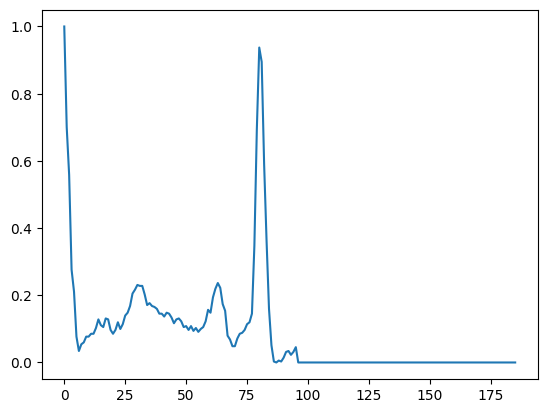

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')
import os
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)
train_df[187]=train_df[187].astype(int) #converting 187th point to integer type
equilibre=train_df[187].value_counts() #counting unique values
h5file="best_model.h5"
import keras
from keras.models import load_model
 
loaded_model = load_model(h5file)
import numpy as np
my_tuple = train_df
my_array = np.array(my_tuple)
my_array=(my_array[553][:186]).reshape(-1, 186, 1)
y_predict=loaded_model.predict(my_array)
y_pred_inv = np.argmax(y_predict, axis=1)
if y_pred_inv==[0]:
    print("Non-ecotic beats detected")
    n=0
elif y_pred_inv==[1]:
    print("Supraventricular ectopic beats detected")
    n=1
elif y_pred_inv==[2]:
    print("Ventricular ectopic beats detected")
    n=2
elif y_pred_inv==[3]:
    print("Fusion Beats detected")
    n=3
elif y_pred_inv==[4]:
    print("Unknown Beats detected")
    n=4
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
plt.plot(c.iloc[n,:186]) 


In [4]:
train_df.iloc[0]

0      0.977941
1      0.926471
2      0.681373
3      0.245098
4      0.154412
         ...   
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    0.000000
Name: 0, Length: 188, dtype: float64

# Gsheets

In [45]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import array
lim=186
sl=0
# define scope and credentials
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('awake-378606-b74d85534598.json', scope)

# authorize and open the sheet
client = gspread.authorize(creds)
sheet = client.open('awakearr')
worksheet = sheet.get_worksheet(0) # get the first sheet
while True:
    while '-1' in worksheet.col_values(2)[sl:lim]:
        print("waititing",lim)
        
        time.sleep(4)

    # read the first 186 values from the second column
    column_values = worksheet.col_values(2)[sl:lim]
    sl=lim
    lim= lim+lim
    

    # convert column values to an array of integers
    column_array = array.array('f', map(float, column_values))
    import numpy as np

    # create a NumPy array from the list
    x_array = np.array(column_array)

    # reshape the array
    x_reshaped = x_array.reshape(-1, 186, 1)
    y_predict=loaded_model.predict(x_reshaped)
    y_pred_inv = np.argmax(y_predict, axis=1)
    if 0 in y_pred_inv:
        print("Non-ecotic beats detected")
        n=0
    elif 1 in y_pred_inv:
        print("Supraventricular ectopic beats detected")
        n=1
    elif 2 in y_pred_inv:
        print("Ventricular ectopic beats detected")
        n=2
    elif 3 in y_pred_inv:
        print("Fusion Beats detected")
        n=3
    elif 4 in y_pred_inv:
        print("Unknown Beats detected")
        n=4



waititing 186
waititing 186
waititing 186
waititing 186
waititing 186
waititing 186
waititing 186
waititing 186
waititing 186
1/1 [==============================] - 0s 31ms/step
Supraventricular ectopic beats detected
waititing 372
waititing 372
waititing 372
waititing 372


KeyboardInterrupt: 